# Predicting with model v1

In [93]:
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
model = load('model_v1.1.joblib') 

In [94]:
df = pd.read_csv("../data/BTCUSDT-hour-predict.csv")
df_sma = pd.read_csv("../data/modelv1_prediction_sma_data")

In [95]:
np.random.seed(42)
df = pd.concat([df[list(df.columns)[12:]].copy(), df_sma], axis=1)

In [64]:
df = pd.read_csv("../data/modelv1.1_testing.csv")

In [96]:
df.dropna(inplace=True)
close = df["close"]
df.drop('close', axis=1, inplace=True)

In [97]:
print(df[df['close']==57281.33].index.values)
df[1571-249:].head(3)

KeyError: 'close'

In [66]:
df.tail()

,volume_cmf_50,volume_cmf_50_rate_200,volume_eom_amplified,volume_fi_amplified,volume_mfi_50,volume_nvi_o_close_rate_50,volatility_atr_14,volatility_atr_o_close,volatility_bb_wband_10,volatility_bb_pband_100,...,sma_close_200,log_sma_close_200,sma_diff_d_close_50,sma_diff_d_close_20,sma_diff_d_close_200,log_sma_diff_d_close_50,log_sma_diff_d_close_20,log_sma_diff_d_close_200,abs_sma_diff_d_close_50,close
3058,0.029769,-0.000522,-23.649564,-13.647996,39.598164,0.081544,771.788197,0.013721,3.903610,0.443228,...,0.986360,0.0,0.006723,-0.008784,0.013640,0.543651,-0.568041,0.608186,0.006723,56247.17
3059,0.059926,-0.000424,-23.464099,11.703731,42.117758,0.065953,812.396897,0.014257,5.170340,0.585822,...,0.973491,0.0,0.019595,0.004054,0.026509,0.641679,0.498108,0.669216,0.019595,56982.80
3060,0.104171,-0.000183,-22.923038,14.092558,45.862386,0.035621,811.272119,0.014076,6.655002,0.712589,...,0.965321,0.0,0.027600,0.011502,0.034679,0.673153,0.593464,0.693942,0.027600,57636.74
3061,0.082426,-0.000282,-22.811637,13.668284,49.282834,0.040178,813.493396,0.014169,6.721042,0.670766,...,0.963094,0.0,0.029467,0.012488,0.036906,0.679194,0.601054,0.699682,0.029467,57414.77
3062,0.077597,-0.000303,-22.797324,13.538936,49.375676,0.040178,791.240297,0.013813,6.553983,0.645837,...,0.963990,0.0,0.028210,0.010533,0.036010,0.675211,0.585535,0.697431,0.028210,57281.33


In [90]:
df.columns

Index(['volume_cmf_50', 'volume_cmf_50_rate_200', 'volume_eom_amplified',
       'volume_fi_amplified', 'volume_mfi_50', 'volume_nvi_o_close_rate_50',
       'volatility_atr_14', 'volatility_atr_o_close', 'volatility_bb_wband_10',
       'volatility_bb_pband_100', 'volatility_bb_wband_200',
       'volatility_bb_hband_o_close', 'volatility_dc_pband_50',
       'volatility_dc_wband_10', 'volatility_pband_50', 'volatility_wband_20',
       'volatility_ui_30', 'log_rate_sma_50', 'log_rate_sma_20',
       'log_rate_sma_200', 'sma_close_50', 'log_sma_close_50', 'sma_close_20',
       'log_sma_close_20', 'sma_close_200', 'log_sma_close_200',
       'sma_diff_d_close_50', 'sma_diff_d_close_20', 'sma_diff_d_close_200',
       'log_sma_diff_d_close_50', 'log_sma_diff_d_close_20',
       'log_sma_diff_d_close_200', 'abs_sma_diff_d_close_50'],
      dtype='object')

'cmf_50', 'cmf_50_rate_200', 'eom_amplified', 'fi_amplified', 'mfi_50',
'nvi_o_close_rate_50', 'atr_14', 'atr_o_close', 'bb_wband_10',
'bb_pband_100', 'bb_wband_200', 'bb_hband_o_close', 'dc_pband_50',
'dc_wband_10', 'pband_50', 'wband_20', 'ui_30', 'log_rate_sma_50',
'log_rate_sma_20', 'log_rate_sma_200', 'sma_close_50',
'log_sma_close_50', 'sma_close_20', 'log_sma_close_20', 'sma_close_200',
'log_sma_close_200', 'sma_diff_d_close_50', 'sma_diff_d_close_20',
'sma_diff_d_close_200', 'log_sma_diff_d_close_50',
'log_sma_diff_d_close_20', 'log_sma_diff_d_close_200',
'abs_sma_diff_d_close_50'

In [98]:
results = model.predict(df)

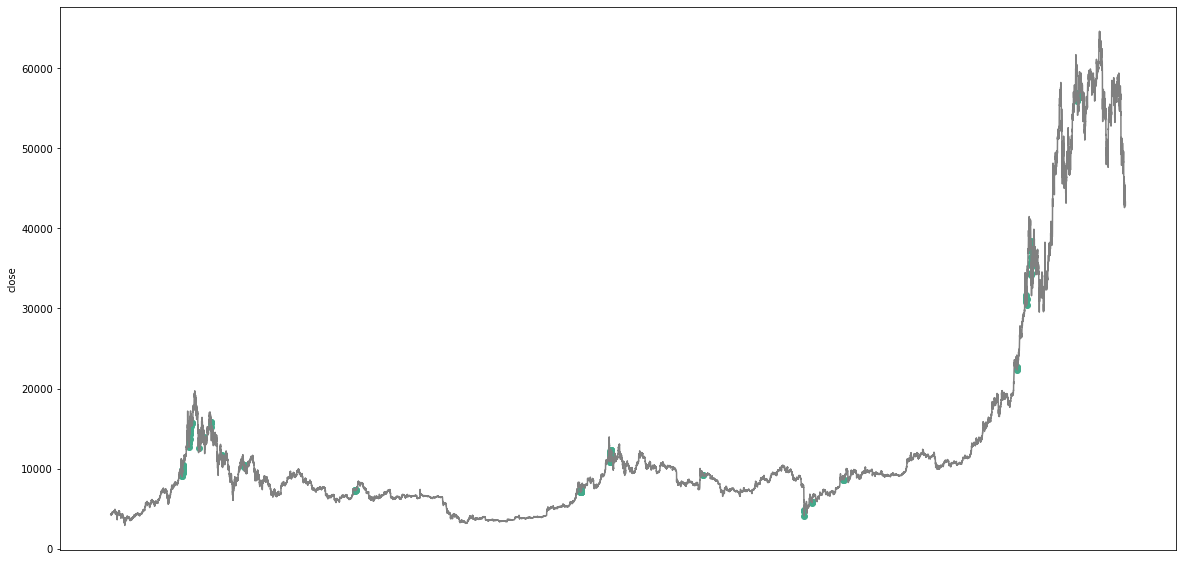

In [99]:
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close))

# s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft, close))
# s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft, close))
# s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft, close))

fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close)
ax.scatter(range(rows), 
            scatter_results,
            color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close,
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)